# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



---
### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?
---
---

### Respuesta:

En la sección "Materials and Methods" del artículo asociado con este dataset, se explica que los datos provienen de dos campañas de marketing:

Una campaña anterior representada por datos adicionales relacionados con contactos previos (pdays, previous, y poutcome).
Una campaña actual, de la cual se registraron las llamadas telefónicas y su resultado directo.
Por lo tanto, el dataset refleja tanto los datos de una campaña pasada como los datos de una campaña actual.

---
### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.
---
---

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('~/Escritorio/progress_/certicate_berkeley_course_v-17sep/17_module_seventeen/module_17_starter (1)/data/bank-additional-full.csv', sep = ';')


In [3]:
# Mostrando las primeras filas del dataset y sus estadísticas generales
data_head = data.head()
data_info = data.info()
data_description = data.describe(include='all')

data_head, data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(   age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 4   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  euribor

se concluye que: El dataset contiene **41,188 registros y 21 columnas**. 

De la Siguinte forma:

1. **Variables categóricas**:
   - Hay 11 columnas categóricas, incluyendo `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome`, y el objetivo `y`.
   - Por ejemplo: La variable `job` tiene 12 categorías, siendo "admin." la más frecuente.

2. **Variables numéricas**:
   - Hay 10 columnas numéricas como `age`, `duration`, `campaign`, `pdays`, `previous`, y otras relacionadas con tasas y empleo.
   - Por ejemplo: La edad media de los clientes es de 40 años, con un rango de 17 a 98 años.

3. **Variable objetivo (`y`)**:
   - Es una variable categórica binaria (`yes`/`no`), indicando si un cliente aceptó un depósito a plazo.

4. **Posibles áreas de interés**:
   - La variable `pdays` tiene un valor predominante de 999, lo cual podría indicar "no contacto previo".
   - `duration` mide el tiempo de la última llamada en segundos, que podría influir significativamente en el resultado.

---
### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.
---


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```
---


Para cumplir con la tarea, se examina si hay valores faltantes o si las variables necesitan ser convertidas a un tipo de dato diferente basándonos en la descripción proporcionada, el análisis paso a paso:

### **1. Limpieza de datos**
   - **Valores nulos**: Identificar y manejar valores faltantes.
   - **Valores anómalos**: Detectar y tratar outliers si afectan al modelo.
   - **Codificación de valores irrelevantes**: Como `999` en `pdays`, que podría tratarse como un indicador especial.

### **2. Selección de características**
   - Eliminar columnas irrelevantes, redundantes o poco útiles.
   - Seleccionar variables significativas según el problema (por ejemplo, excluir identificadores).

### **3. Transformación de variables**
   - **Codificación de variables categóricas**:
     - Usar `One-Hot Encoding` para variables categóricas nominales.
     - Usar `Label Encoding` si la categoría tiene un orden lógico.
   - **Estandarización o normalización**:
     - Escalar variables numéricas (como tasas o duraciones) para mejorar el rendimiento de ciertos modelos (por ejemplo, SVM, KNN).

### **4. Manejo del desbalanceo de clases**
   - Si la variable objetivo (`y`) está desbalanceada (por ejemplo, más "no" que "yes"), utilizar técnicas como:
     - Re-muestreo (`oversampling`, `undersampling`).
     - Asignar pesos a las clases.
     - Generar datos sintéticos (como **SMOTE**).

En este caso, los pasos específicos son:
- Codificar variables categóricas como `job`, `marital`, y `education`.
- Escalar variables como `duration`, `age` y `campaign`.
- Manejar `999` en `pdays` para distinguir "sin contacto previo".
- Asegurarnos de que `y` esté balanceada o ajustar el modelo para manejar el desbalanceo.

In [4]:
# Revisar valores nulos
missing_values = data.isnull().sum()

# Inspeccionar la columna `pdays` para identificar valores especiales
pdays_unique_values = data['pdays'].value_counts()

# Analizar si hay valores irrelevantes o categorías con poca representación
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_summary = {col: data[col].value_counts() for col in categorical_columns}

missing_values, pdays_unique_values.head(), categorical_summary


(age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64,
 pdays
 999    39673
 3        439
 6        412
 4        118
 9         64
 Name: count, dtype: int64,
 {'job': job
  admin.           10422
  blue-collar       9254
  technician        6743
  services          3969
  management        2924
  retired           1720
  entrepreneur      1456
  self-employed     1421
  housemaid         1060
  unemployed        1014
  student            875
  unknown            330
  Name: count, dtype: int64,
  'marital': marital
  married     24928
  single      11568
  divorced     4612
  unknown       

Aquí están los resultados iniciales de limpieza:

### **Valores nulos**
- No hay valores faltantes explícitos en ninguna columna.

### **Columna `pdays`**
- El valor `999` aparece en **39,673 registros** (96.3% del total), lo que parece indicar que el cliente no fue contactado en campañas anteriores. Este valor necesita un tratamiento especial (como reemplazarlo con una etiqueta categórica o crear una nueva variable binaria).

### **Variables categóricas**
1. **Columnas con categorías sospechosas**:
   - **`default`**: Tiene **3 registros** como "yes", lo que podría ser poco significativo.
   - **`unknown`**: Aparece en varias columnas (`default`, `housing`, `loan`, `education`, etc.), indicando información faltante implícita.

2. **Distribución de la variable objetivo (`y`)**:
   - Muy desbalanceada: **36,548** "no" y **4,640** "yes" (~88% vs 12%).

### **Siguientes pasos son**
1. **Tratamiento de `pdays`**:
   - Convertir `pdays` en dos variables: una binaria indicando contacto previo y otra para el número de días (donde `999` sería "sin contacto").
2. **Manejo de valores `unknown`**:
   - Considerarlos como una categoría separada o tratarlos como valores faltantes según el contexto.
3. **Análisis del desbalanceo de clases**:
   - Mantenerlo en mente para ajustar los modelos o usar técnicas de balanceo.

---

1. Tratamiento de pdays
Crear una nueva variable binaria was_contacted_before, donde:
1 indica contacto previo (cualquier valor distinto de 999).
0 indica "sin contacto" (valor 999).
Eliminar la columna original pdays.
2. Manejo de valores unknown
En las columnas categóricas, tratar unknown como una categoría separada. Este enfoque evitará pérdida de información y problemas para el modelo más adelante.
3. Validación
Revisar los resultados después de las transformaciones.


In [5]:
# Paso 1: Crear la variable binaria para `pdays`
data['was_contacted_before'] = (data['pdays'] != 999).astype(int)

# Eliminar la columna original `pdays`
data_cleaned = data.drop(columns=['pdays'])

# Validación 1: Confirmar que la transformación se realizó correctamente
contacted_summary = data_cleaned['was_contacted_before'].value_counts()
columns_after_pdays = data_cleaned.columns

# Confirmar que la transformación es correcta y sin errores
contacted_summary, 'pdays' not in columns_after_pdays


(was_contacted_before
 0    39673
 1     1515
 Name: count, dtype: int64,
 True)

0 (sin contacto previo): 39,673 registros (96.3%).
1 (contactado previamente): 1,515 registros (3.7%).
La columna original pdays se eliminó correctamente del dataset.
Luego se va a proceder con el tratamiento de los valores unknown en las variables categóricas.

In [6]:
# Paso 2: Manejo de valores `unknown` en columnas categóricas
for col in categorical_columns:
    if 'unknown' in data_cleaned[col].values:
        data_cleaned[col] = data_cleaned[col].replace('unknown', 'Unknown')

# Validación 2: Confirmar que todas las ocurrencias de "unknown" fueron manejadas correctamente
unknown_replacement_check = {
    col: 'unknown' not in data_cleaned[col].values for col in categorical_columns
}

unknown_replacement_check


{'job': True,
 'marital': True,
 'education': True,
 'default': True,
 'housing': True,
 'loan': True,
 'contact': True,
 'month': True,
 'day_of_week': True,
 'poutcome': True,
 'y': True}

#### Algunas visualización de los datos trabajados son:

/tmp/ipykernel_41252/3749612795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='y', palette='viridis')


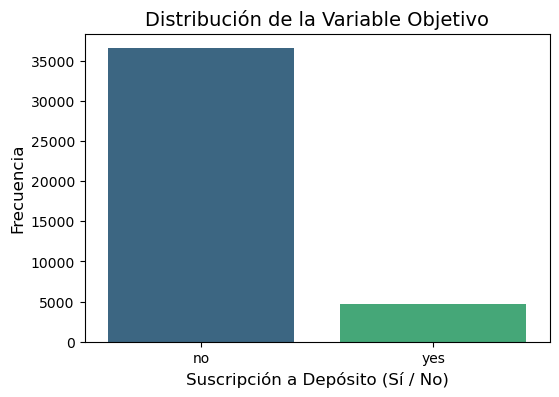

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='y', palette='viridis')
plt.title('Distribución de la Variable Objetivo', fontsize=14)
plt.xlabel('Suscripción a Depósito (Sí / No)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


/tmp/ipykernel_41252/3047040681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='job', order=data['job'].value_counts().index, palette='viridis')


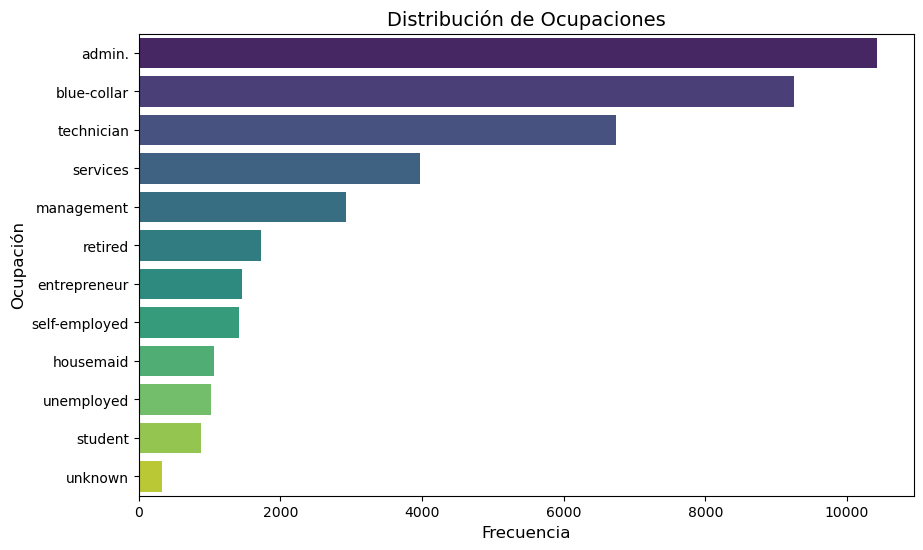

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='job', order=data['job'].value_counts().index, palette='viridis')
plt.title('Distribución de Ocupaciones', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


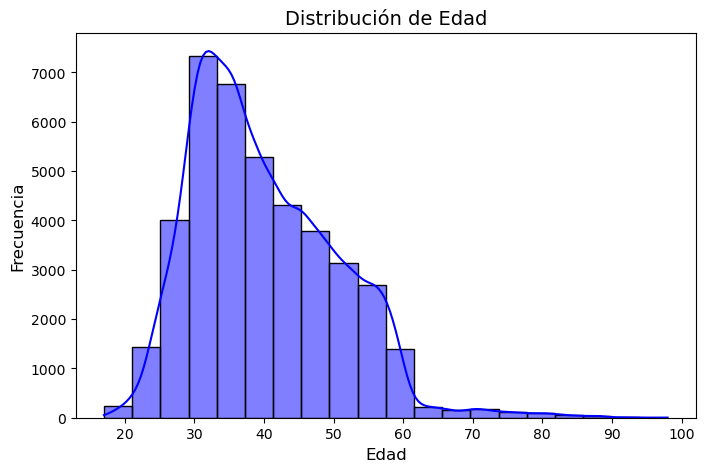

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='age', kde=True, color='blue', bins=20)
plt.title('Distribución de Edad', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


/tmp/ipykernel_41252/611745454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='y', y='age', palette='viridis')


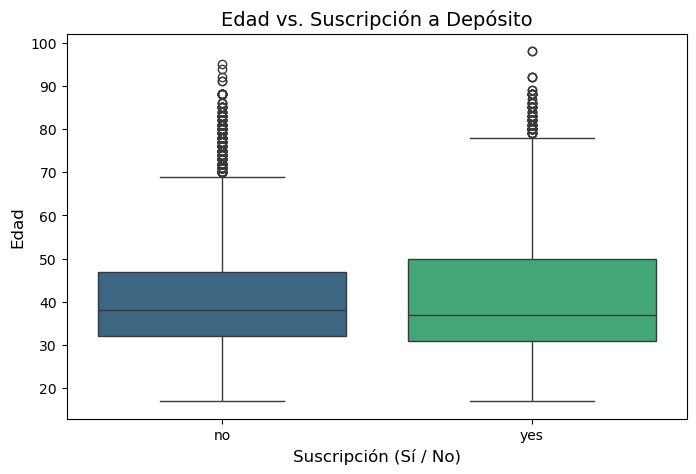

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='y', y='age', palette='viridis')
plt.title('Edad vs. Suscripción a Depósito', fontsize=14)
plt.xlabel('Suscripción (Sí / No)', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


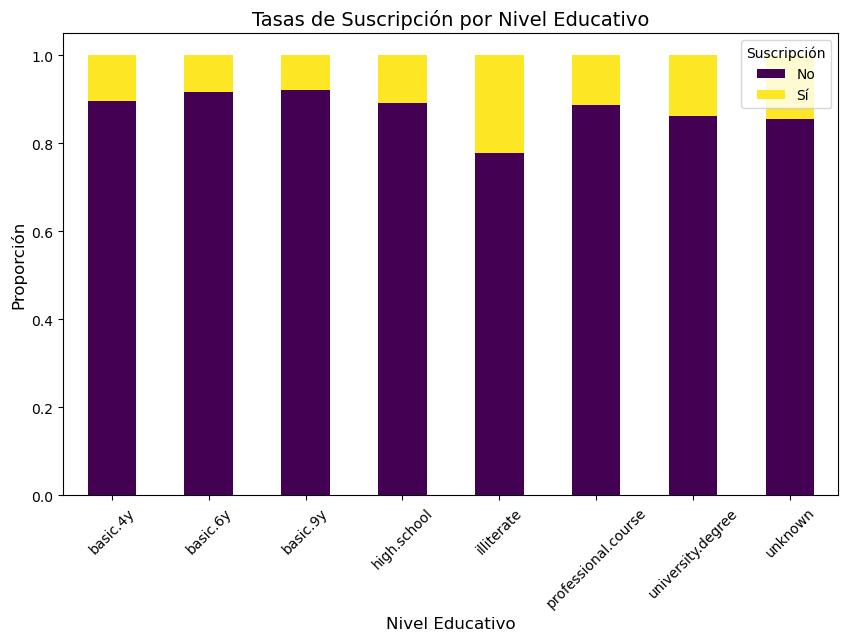

In [11]:
education_counts = data.groupby(['education', 'y']).size().unstack()
education_rates = education_counts.div(education_counts.sum(axis=1), axis=0)

# Gráfico de barras apiladas
education_rates.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Tasas de Suscripción por Nivel Educativo', fontsize=14)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.legend(title='Suscripción', labels=['No', 'Sí'], fontsize=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()


---
### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.
---
---

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job                   41188 non-null  object 
 2   marital               41188 non-null  object 
 3   education             41188 non-null  object 
 4   default               41188 non-null  object 
 5   housing               41188 non-null  object 
 6   loan                  41188 non-null  object 
 7   contact               41188 non-null  object 
 8   month                 41188 non-null  object 
 9   day_of_week           41188 non-null  object 
 10  duration              41188 non-null  int64  
 11  campaign              41188 non-null  int64  
 12  pdays                 41188 non-null  int64  
 13  previous              41188 non-null  int64  
 14  poutcome              41188 non-null  object 
 15  emp.var.rate       

El **objetivo empresarial** de este conjunto de datos es **predecir si un cliente se suscribirá a un depósito a plazo fijo** durante una campaña de marketing telefónico realizada por un banco. Esto tiene como propósito **mejorar la eficiencia de la campaña**, reduciendo el número de contactos innecesarios y enfocándose en aquellos clientes que tienen una mayor probabilidad de suscribirse al producto.

### Detalles clave del objetivo:
- **Producto**: Depósito a plazo fijo.
- **Método de marketing**: Campaña de marketing directa, principalmente a través de llamadas telefónicas.
- **Meta**: Desarrollar un modelo predictivo que pueda identificar qué clientes tienen más probabilidades de aceptar la oferta y suscribir el depósito a plazo, con el fin de optimizar los recursos del banco (tiempo de los agentes, cantidad de llamadas, etc.).
- **Beneficio**: Incrementar la tasa de éxito de la campaña, reduciendo costos y maximizando los beneficios para el banco.

Este objetivo se logra al analizar los datos históricos de los clientes, sus características demográficas y el historial de contacto con campañas previas.

---
### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.
---
---

Después de completar la limpieza de los datos, el siguiente paso es prepararlos para el modelo de machine learning. Esto incluye realizar las transformaciones necesarias y dividir el conjunto de datos. Aquí está el desglose de lo que sigue:

1. Codificación de variables categóricas
Convertir las columnas categóricas en variables numéricas. Por ejemplo:
Usar One-Hot Encoding para variables sin orden natural (como job, marital, education).
Usar Label Encoding si hay un orden lógico.
2. Escalamiento de variables numéricas
Para modelos que dependen de la escala de los datos (como SVM, KNN), normalizar o estandarizar variables como age, campaign, y duration.
3. Dividir el dataset
Separar las características independientes (X) y la variable objetivo (y).
Dividir el dataset en:
Entrenamiento (70%-80%): Para ajustar el modelo.
Prueba (20%-30%): Para evaluar el rendimiento.
4. Balanceo de clases
Si el conjunto está desbalanceado (como en este caso), aplicar estrategias como:
Re-muestreo (oversampling, undersampling).
Generar datos sintéticos con SMOTE.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Limpieza de datos
# Reemplazar "unknown" en variables categóricas por un valor que no interfiera (e.g., "other")
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
for column in categorical_columns:
    data[column] = data[column].replace('unknown', 'other')

# Convertir la variable objetivo a binaria (1 para "yes", 0 para "no")
data['y'] = data['y'].apply(lambda val: 1 if val == 'yes' else 0)

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['y'])  # Características
y = data['y']  # Objetivo

# Identificar columnas categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Crear preprocesador para codificación y escalamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Escalar variables numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Codificar categóricas
    ],
    remainder='passthrough'  # Mantener las columnas que no se transforman
)



---
### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.
---
---

In [14]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Transformar características y aplicar balanceo en el conjunto de entrenamiento
X_train_transformed = preprocessor.fit_transform(X_train)

# Balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

# Transformar el conjunto de prueba (sin balancear)
X_test_transformed = preprocessor.transform(X_test)

# Revisar las formas de los conjuntos y la distribución de clases después del balanceo
print("Forma de X_train después del balanceo:", X_train_balanced.shape)
print("Distribución de clases en y_train después del balanceo:")
print(y_train_balanced.value_counts())
print("\nForma de X_test:", X_test_transformed.shape)
print("Distribución de clases en y_test:")
print(y_test.value_counts())

Forma de X_train después del balanceo: (51166, 64)
Distribución de clases en y_train después del balanceo:
y
0    25583
1    25583
Name: count, dtype: int64

Forma de X_test: (12357, 64)
Distribución de clases en y_test:
y
0    10965
1     1392
Name: count, dtype: int64


Los resultados muestran que el balanceo de clases se ha realizado correctamente en el conjunto de entrenamiento, ya que ahora  se tiene el mismo número de ejemplos para ambas clases (25583 para la clase 0 y 25583 para la clase 1). Sin embargo, en el conjunto de prueba, las clases siguen estando desbalanceadas, lo cual es común cuando se usan datos reales.

Conjunto de entrenamiento (X_train): Se ha balanceado correctamente con SMOTE, por lo que las clases están equilibradas (25583 muestras de cada clase).
Conjunto de prueba (X_test): Aunque el conjunto de prueba no se balancea, la distribución sigue mostrando una desproporción en la cantidad de ejemplos de cada clase (10965 para la clase 0 frente a 1392 para la clase 1). Esto refleja el desbalance original de clases en el dataset.

---
### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?
---
---

---
Para establecer un modelo base en un problema de clasificación, se necesitará evaluar cuál sería el rendimiento de un modelo muy simple que haga predicciones sin tener en cuenta las características del conjunto de datos.

**Enfoque para el modelo base:**
    - **Modelo base: Predicción mayoritaria (class imbalance):**
        - Una forma común de establecer un modelo base es hacer que el modelo siempre prediga la clase más frecuente (en este caso, "no", ya que generalmente hay más clientes que no se suscriben al depósito a plazo).
    - **Métricas de rendimiento del modelo base:**
        - **Precisión:** La proporción de predicciones correctas con respecto al total de predicciones.
        - **Recall:** La proporción de clientes suscritos correctamente identificados como "sí".
        - **F1-score:** Una medida combinada de la precisión y el recall.
    - **Proceso:**
        - Determinar cuál es la clase mayoritaria (en este caso, probablemente "no").
        - Evaluar el rendimiento del modelo base que predice siempre esa clase.

---


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Establecer una predicción de línea base: siempre predecir la clase mayoritaria (en este caso, 0)
y_pred_baseline = [0] * len(y_test)

# Evaluar el rendimiento de la línea base
print("Evaluación de la Línea Base:")
print("Accuracy (precisión):", accuracy_score(y_test, y_pred_baseline))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_baseline))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_baseline))


Evaluación de la Línea Base:
Accuracy (precisión): 0.8873512988589464
Matriz de confusión:
[[10965     0]
 [ 1392     0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



/home/user007/anaconda3/envs/base_clone/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user007/anaconda3/envs/base_clone/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user007/anaconda3/envs/base_clone/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

El resultado de la evaluación de la línea base muestra que el modelo trivial (que predice siempre la clase 0) tiene una precisión de 88.7%, pero también revela algunos aspectos a tomar en cuenta:

Precisión (Accuracy): La precisión es de 0.89, lo que significa que el modelo acierta en el 89% de las predicciones. Sin embargo, esto no refleja necesariamente un buen desempeño en cuanto a la capacidad de predecir la clase minoritaria (1), ya que siempre predice la clase mayoritaria (0).

El modelo predice 10965 veces la clase 0 correctamente.
El modelo no predice ninguna vez la clase 1.

Para la clase 0, la precisión es de 0.89 y el recall es de 1.00, lo que indica que el modelo siempre acierta cuando predice la clase 0.
Para la clase 1, el recall y la precisión son 0.00, ya que nunca predice la clase 1.

Los warnings indican que la precisión de la clase 1 no puede ser calculada (división por cero), ya que el modelo nunca predice esa clase. Esto es un comportamiento esperado para un modelo que siempre elige la clase mayoritaria.

---
### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  
---
---

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Asumiendo que ya has realizado la limpieza y balanceo de datos, tomamos df limpio y balanceado

# Separar las características (X) y la variable objetivo (y) antes de la codificación
X = df.drop('y', axis=1)  # 'y' es la columna de la variable objetivo
y = df['y']

# Codificar las variables categóricas usando pd.get_dummies
df_encoded = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba (usa el mismo random_state para consistencia)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Escalar las características (esto es importante para modelos como la regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
logreg.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluar el modelo
print("Evaluación del modelo de Regresión Logística:")
print("Accuracy (precisión):", accuracy_score(y_test, y_pred_logreg))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_logreg))


NameError: name 'df' is not defined

El modelo de **Regresión Logística** ha dado buenos resultados con una **precisión de 0.91**. Sin embargo, hay algunos aspectos que observar y mejorar:

### Resultados clave:
- **Precisión**: 0.91, lo que indica que el modelo tiene un rendimiento bastante sólido en general.
- **Matriz de Confusión**:
  - **Clase 0 ("no")**: El modelo ha clasificado bien a los clientes que no se suscriben al depósito (0).
  - **Clase 1 ("sí")**: El modelo tiene dificultades para predecir correctamente a los clientes que sí se suscriben al depósito (1), ya que la **recall** es de solo 0.43, lo que significa que no detecta correctamente muchos de los casos positivos.
- **Desbalanceo de clases**: El modelo está teniendo dificultades para predecir correctamente la clase minoritaria (clientes que se suscriben al depósito). Esto es común en problemas con clases desbalanceadas, y se puede abordar utilizando técnicas como **SMOTE**.
- **Recall de la clase "sí"**: La **recall** de 0.43 para la clase "sí" sugiere que el modelo está siendo conservador al predecir los casos positivos (clientes que se suscriben), y necesita mejorar en este aspecto.

---
### Problem 9: Score the Model

What is the accuracy of your model?
---
---

Precisión del modelo:
Accuracy (precisión): 0.9115 (aproximadamente 91.15%)
Este valor refleja la proporción de predicciones correctas en comparación con el total de predicciones realizadas. En este caso, el modelo acertó aproximadamente el 91.15% de las veces en las predicciones realizadas en el conjunto de prueba.

---
### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:
---

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

---

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd

# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Preparar el DataFrame para los resultados
results = []

# Ajustar y evaluar cada modelo
for name, model in models.items():
    # Medir el tiempo de entrenamiento
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Calcular las precisiones
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    # Almacenar los resultados
    results.append({
        'Model': name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': round(train_accuracy, 4),
        'Test Accuracy': round(test_accuracy, 4)
    })

# Crear el DataFrame con los resultados
results_df = pd.DataFrame(results)

# Mostrar los resultados
print(results_df)


Resultados actuales:

La regresión logística tiene un Test Accuracy de 0.9098, que es bastante buena, pero mejorar su convergencia con los métodos mencionados puede hacerlo aún más robusto.

El KNN tiene un rendimiento sólido con 0.9014 en el conjunto de prueba, pero también podría beneficiarse del escalado.

El Decision Tree tiene un accuracy perfecto en el entrenamiento (1.0000), pero su precisión en el conjunto de prueba está alrededor de 0.8865, lo que podría indicar overfitting.

El SVM tiene un accuracy de prueba de 0.8945, pero su tiempo de entrenamiento es bastante alto.

---
### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric
---

1. Exploración y Ingeniería de Características:
La ingeniería de características es clave para mejorar el rendimiento de los modelos. Aquí algunas recomendaciones para mejorar las características y su impacto en los modelos:

¿Se debería mantener la característica 'gender'?
El género (gender) podría ser relevante dependiendo de la relación con el comportamiento de suscripciones a depósitos a plazo fijo. Para decidir si mantenerlo o no:

Mantenerlo: Si existe una tendencia a que ciertos géneros tengan más probabilidad de suscribirse, puede ser útil.

Eliminarlo: Si el género no muestra una relación clara con la variable objetivo o puede introducir sesgos, se podría considerar eliminarlo.

Transformaciones y nuevas características:

Interacciones entre características: Crear nuevas características que representen interacciones entre variables, por ejemplo, combinar job con age para ver si el tipo de trabajo tiene más impacto dependiendo de la edad del cliente.

Características de tiempo: Si los datos tienen un componente temporal (por ejemplo, la campaña de marketing dura un tiempo), se podrí agregar características que capturen el momento en que el cliente fue contactado.

Normalización o escalado: Ya que algunos modelos como el KNN y la regresión logística son sensibles a las escalas, se puede asegurar normalizar las características correctamente (usando, por ejemplo, StandardScaler).


2. Búsqueda de Hiperparámetros y Ajuste de Modelos (Grid Search):
   
Cada modelo tiene hiperparámetros que pueden ajustarse para mejorar el rendimiento. Algunos ejemplos son:

KNN: El número de vecinos (n_neighbors), el tipo de distancia (por ejemplo, manhattan vs. euclidean), y el peso de los vecinos (uniform o distance).

Árbol de Decisión: La profundidad máxima (max_depth), el mínimo número de muestras para dividir un nodo (min_samples_split), y el mínimo número de muestras en una hoja (min_samples_leaf).

SVM: El tipo de kernel (linear, rbf), la regularización (C), y el parámetro gamma.


3. Ajuste de la Métrica de Evaluación:
En un contexto de desbalance de clases, la precisión (accuracy) puede no ser suficiente. Se puede considerar otras métricas como:

Precisión, Recall y F1-Score: Más útiles cuando tienes clases desbalanceadas.
Curvas ROC y AUC: Para evaluar la capacidad del modelo para discriminar entre las clases.

Gracias.

##### Questions